# Данные по афазии

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel

### загрузка данных

In [ ]:
df_healthy = pd.read_excel('/content/Копия_clusters_dataset.xlsx',
                           sheet_name='healthy_all')
df_aphasia = pd.read_excel('/content/Копия_clusters_dataset.xlsx',
                           sheet_name='aphasia_all')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Копия_clusters_dataset.xlsx'

In [ ]:
df_aphasia = df_aphasia.iloc[:68]

In [ ]:
df_healthy = df_healthy.iloc[:94]

### различия между нормой и афазией

размер кластеров

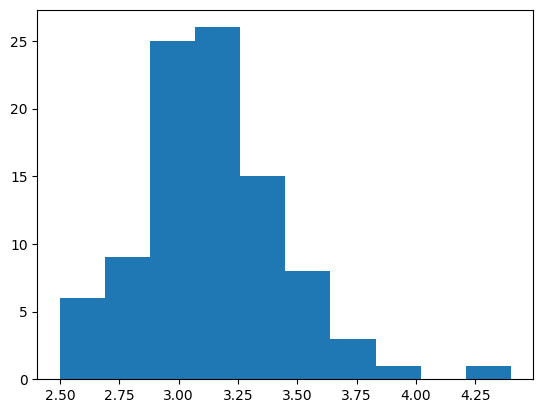

In [ ]:
plt.hist(df_healthy.Mean_cluster_size)
plt.show()

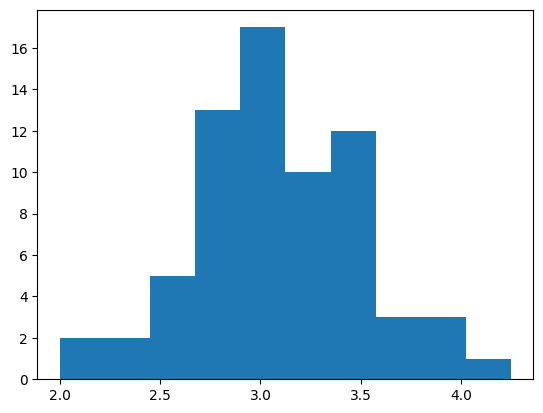

In [ ]:
plt.hist(df_aphasia.Mean_cluster_size)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [ ]:
t_test, p = ttest_ind(df_healthy.Mean_cluster_size, df_aphasia.Mean_cluster_size)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 1.072319555088662, p-value: 0.285191245908281


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Same distributions (H0)


кол-во свитчей

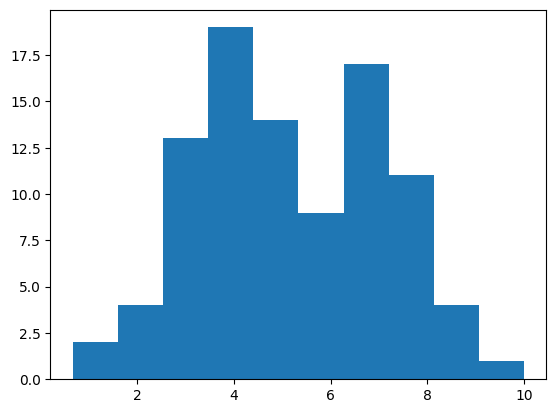

In [ ]:
plt.hist(df_healthy.Avg_switch_number)
plt.show()

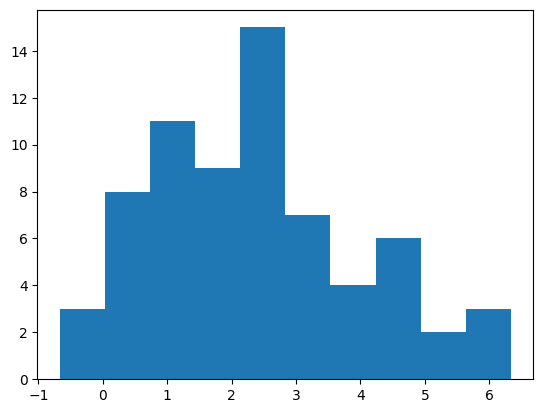

In [ ]:
plt.hist(df_aphasia.Avg_switch_number)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [ ]:
t_test, p = ttest_ind(df_healthy.Avg_switch_number, df_aphasia.Avg_switch_number)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 10.17586404392428, p-value: 4.5583124566748045e-19


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


t-score

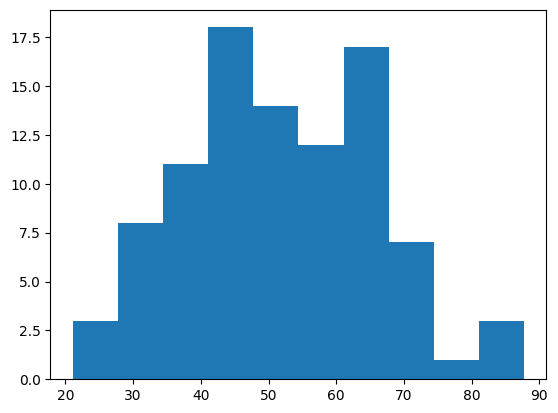

In [ ]:
plt.hist(df_healthy.Average_cluster_t_score)
plt.show()

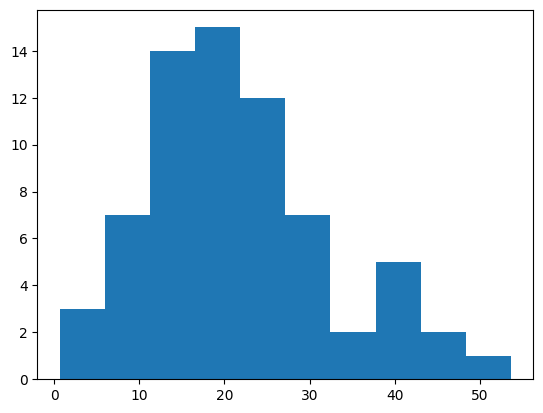

In [ ]:
plt.hist(df_aphasia.Average_cluster_t_score)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [ ]:
t_test, p = ttest_ind(df_healthy.Average_cluster_t_score, df_aphasia.Average_cluster_t_score)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 14.507723707344793, p-value: 5.609725990995729e-31


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


silhouette-score

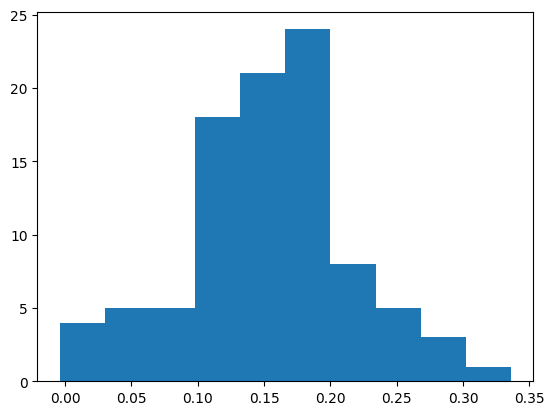

In [ ]:
plt.hist(df_healthy.Average_silhouette_score)
plt.show()

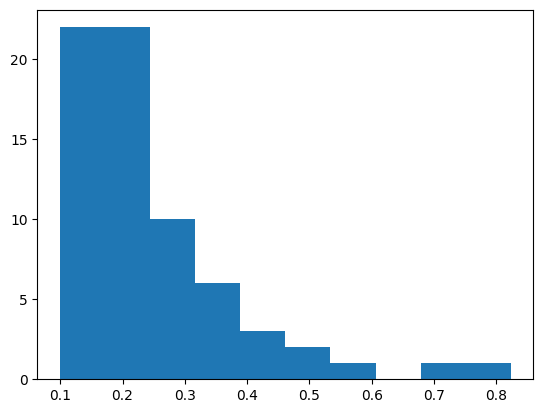

In [ ]:
plt.hist(df_aphasia.Average_silhouette_score)
plt.show()

In [ ]:
# распределения разные, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

In [ ]:
u_test, p = mannwhitneyu(df_healthy.Average_cluster_t_score, df_aphasia.Average_cluster_t_score)
print(f'statistic: {u_test}, p-value: {p}')

statistic: 6088.0, p-value: 9.898488587458599e-23


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


### отличия метрик по категории "профессии"

t-score - проверяем попарно между всеми категориями

In [ ]:
# между категориями "города" и "животные"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_animals, df_healthy.Mean_cluster_t_score_cities)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 1.7613288740905845e-11
Different distributions (reject H0)


In [ ]:
# между категориями "профессии" и "животные"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_animals, df_healthy.Mean_cluster_t_score_professions)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 2.2538163712931107e-28
Different distributions (reject H0)


In [ ]:
# между категориями "города" и "профессии"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_professions, df_healthy.Mean_cluster_t_score_cities)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 2.6750776286951394e-14
Different distributions (reject H0)


# Данные по ПР: тексты

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel

import seaborn as sns

## загрузка данных

In [ ]:
df_healthy = pd.read_excel('clusters_metrics_dataset.xlsx',
                           sheet_name='healthy').loc[0:500]
df_pd = pd.read_excel('clusters_metrics_dataset.xlsx',
                           sheet_name='PD').loc[0:68]

In [ ]:
df_healthy

,ID,tokens,Switch_number_tokens,Mean_cluster_size_tokens,Mean_distance_tokens,Silhouette_score_tokens,Mean_cluster_t_score_tokens,tokens_without_stops,Switch_number_tokens_without_stops,Mean_cluster_size_tokens_without_stops,...,Mean_cluster_size_lemmas,Mean_distance_lemmas,Silhouette_score_lemmas,Mean_cluster_t_score_lemmas,lemmas_without_stops,Switch_number_lemmas_without_stops,Mean_cluster_size_lemmas_without_stops,Mean_distance_lemmas_without_stops,Silhouette_score_lemmas_without_stops,Mean_cluster_t_score_lemmas_without_stops
0,PN-01,"[['необходимо', 'на', 'пол', 'положить', 'стол...",42.0,5.661765,0.428440,0.199664,508.109940,"[['необходимо', 'пол', 'положить', 'столешницу...",30.0,7.166667,...,5.632353,0.489722,0.273070,720.614508,"[['необходимый', 'пол', 'положить', 'столешниц...",28.0,7.111111,0.480149,0.251540,266.433253
1,PN-01,"[['самым', 'запоминающимся', 'подарком', 'был'...",14.0,5.370370,0.491251,0.185619,299.437973,"[['самым', 'запоминающимся', 'подарком', 'посл...",8.0,6.647059,...,5.290909,0.529752,0.268354,344.497041,"[['самым', 'запоминаться', 'подарок', 'последн...",8.0,6.606061,0.430015,0.130678,201.500834
2,PN-01,"[['человек', 'был', 'очень', 'завистливый', 'о...",21.0,5.287671,0.479614,0.225259,375.861670,"[['человек', 'очень'], ['завистливый', 'он'], ...",14.0,6.872340,...,5.438356,0.543546,0.242556,418.212941,"[['человек', 'очень'], ['завистливый', 'он', '...",16.0,7.085106,0.448142,0.191347,124.501709
3,PN-02,"[['переверните', 'крышку', 'табурета'], ['тыль...",41.0,6.311688,0.417164,0.121933,560.059015,"[['переверните', 'крышку', 'табурета'], ['тыль...",33.0,7.600000,...,6.168831,0.464152,0.202697,752.209701,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",34.0,7.434783,0.491429,0.234994,522.506322
4,PN-02,"[['когда', 'я', 'еще', 'училась', 'в'], ['школ...",26.0,4.277108,0.442196,0.091095,277.014617,"[['когда', 'училась', 'школе', 'ко'], ['приеха...",16.0,5.755556,...,4.277108,0.476511,0.064982,412.210461,"[['когда', 'учиться', 'школа', 'к'], ['приехат...",15.0,5.755556,0.460531,0.161854,78.469512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,TPN-14,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",39.0,5.956140,0.380374,0.081968,434.597173,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",28.0,7.271605,...,5.793103,0.461374,0.182359,796.732069,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",23.0,7.123457,0.496351,0.243205,328.805058
497,TPN-14,"[['аудио', 'запись', 'три'], ['расскажите', 'п...",59.0,4.606481,0.463193,0.139887,1058.478950,"[['аудио', 'запись', 'расскажите'], ['лучший',...",37.0,5.968504,...,4.600917,0.510201,0.184970,1110.119659,"[['аудио', 'запись'], ['рассказать', 'хороший'...",40.0,5.937984,0.453659,0.159204,431.789151
498,TPN-14,"[['аудио', 'запись', 'три'], ['расскажите', 'п...",55.0,5.010526,0.476894,0.141315,831.235427,"[['аудио', 'запись', 'расскажите'], ['лучшее',...",36.0,6.533898,...,4.831633,0.537384,0.215904,857.269822,"[['аудио', 'запись'], ['рассказать', 'хороший'...",35.0,6.280992,0.464673,0.186818,328.893759
499,TPN-14,"[['рассказываю', 'подробную', 'историю', 'изоб...",107.0,4.952632,0.430530,0.137201,1282.022786,"[['рассказываю', 'подробную', 'историю'], ['из...",75.0,6.118321,...,4.825193,0.504320,0.200648,1749.997580,"[['рассказывать', 'подробный', 'история'], ['и...",71.0,6.097656,0.439236,0.126299,652.268839


In [ ]:
df_pd

,ID,tokens,Switch_number_tokens,Mean_cluster_size_tokens,Mean_distance_tokens,Silhouette_score_tokens,Mean_cluster_t_score_tokens,tokens_without_stops,Switch_number_tokens_without_stops,Mean_cluster_size_tokens_without_stops,...,Mean_distance_lemmas,Silhouette_score_lemmas,Mean_cluster_t_score_lemmas,lemmas_without_stops,Switch_number_lemmas_without_stops,Mean_cluster_size_lemmas_without_stops,Mean_distance_lemmas_without_stops,Silhouette_score_lemmas_without_stops,Mean_cluster_t_score_lemmas_without_stops,diagnosis
0,PD-001,"[['ну', 'больше', 'всего'], ['меня', 'впечатли...",13.0,5.142857,0.477241,0.105110,173.356602,"[['ну', 'впечатлил'], ['подарок', 'день', 'рож...",7.0,7.086957,...,0.505469,0.152961,156.245227,"[['ну', 'впечатлить'], ['подарок', 'день', 'ро...",6.0,7.043478,0.429536,-0.000615,57.621324,schizotypal.disorder
1,PD-002,"[['не', 'такой'], ['уж', 'обычный', 'традицион...",44.0,4.568047,0.536971,0.198468,513.820124,"[['не', 'обычный', 'традиционный', 'подарок', ...",28.0,6.170455,...,0.563129,0.238804,618.934870,"[['не', 'обычный', 'традиционный', 'подарок'],...",27.0,6.125000,0.515226,0.238879,186.308039,bipolar.affective.disorder
2,PD-004,"[['я', 'была'], ['в', 'начальных', 'классах'],...",44.0,4.629371,0.481372,0.271767,405.407193,"[['я', 'начальных', 'классах'], ['я', 'очень']...",26.0,5.688889,...,0.535013,0.139313,58.018152,"[['я', 'начальный', 'класс'], ['я', 'очень'], ...",25.0,5.428571,0.483758,-0.006125,123.475970,borderline.personality.disorder
3,PD-005,"[['я', 'не', 'помню'], ['свои', 'подарки'], ['...",20.0,4.696970,0.453224,0.113918,185.315282,"[['я', 'помню'], ['свои', 'подарки'], ['наверн...",14.0,6.125000,...,0.491485,0.157894,201.299511,"[['я', 'помнить'], ['свой', 'подарок'], ['наве...",13.0,6.000000,0.452364,0.135730,69.276025,schizotypal.disorder
4,PD-006,"[['так', 'мне', 'запомнился', 'подарок'], ['ко...",38.0,4.682432,0.517010,0.198442,382.635544,"[['запомнился', 'подарок', 'молодой', 'человек...",23.0,6.105882,...,0.528634,0.230140,334.452118,"[['запомниться', 'подарок'], ['молодой', 'чело...",25.0,6.180723,0.472370,0.160692,133.754792,borderline.personality.disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,PD-076,"[['это', 'подарок'], ['собака', 'на', 'новый',...",6.0,4.125000,0.462674,0.207923,92.680873,"[['это', 'подарок'], ['собака', 'новый', 'год'...",5.0,5.133333,...,0.521235,0.270448,82.135843,"[['это', 'подарок'], ['собака', 'новый', 'год'...",4.0,5.066667,0.558888,0.354476,35.920577,schizotypal.disorder
65,PD-078,"[['так', 'ну'], ['хорошо', 'у', 'меня'], ['ког...",40.0,4.402685,0.524687,0.204499,540.656197,"[['так', 'у'], ['времени', 'сходить', 'подарко...",22.0,6.597015,...,0.526479,0.195216,625.599975,"[['так', 'у'], ['время', 'сходить', 'подарок']...",19.0,6.275362,0.497606,0.145375,137.889794,schizophrenia
66,PD-079,"[['однажды', 'с'], ['папой', 'мы'], ['поехали'...",23.0,4.506024,0.446506,0.214002,175.639552,"[['однажды', 'папой'], ['поехали', 'крым'], ['...",18.0,5.655172,...,0.489120,0.144007,160.300200,"[['однажды', 'папа', 'поехать', 'крым'], ['ост...",17.0,5.655172,0.479644,0.131802,93.652401,schizoaffective.disorder
67,PD-080,"[['я', 'один', 'раз'], ['пошла', 'гулять', 'с'...",15.0,4.339623,0.485405,0.223821,101.878658,"[['я', 'пошла'], ['гулять', 'кошкой', 'спрыгну...",7.0,5.580645,...,0.473115,0.180901,107.668551,"[['я', 'пойти', 'гулять', 'кошка', 'спрыгнуть'...",10.0,5.451613,0.457827,0.158249,47.506969,schizotypal.disorder


## проверка нормальности распределений

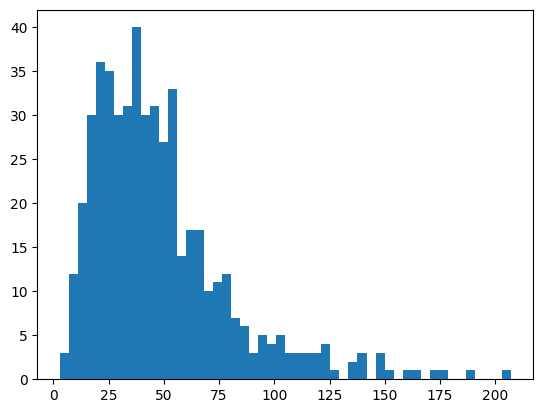

In [ ]:
# 1. number of switches
plt.hist(df_healthy['Switch_number_tokens'], bins=50)
plt.show()

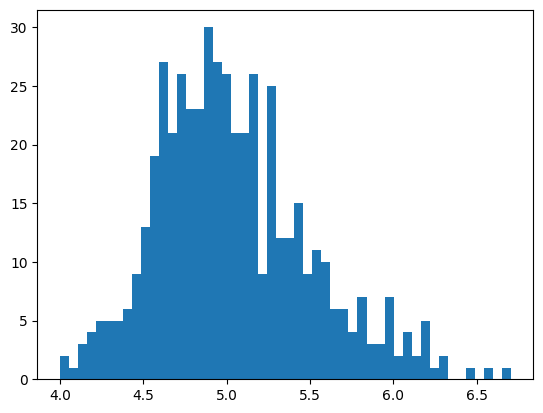

In [ ]:
# 2. cluster size
plt.hist(df_healthy['Mean_cluster_size_tokens'], bins=50)
plt.show()

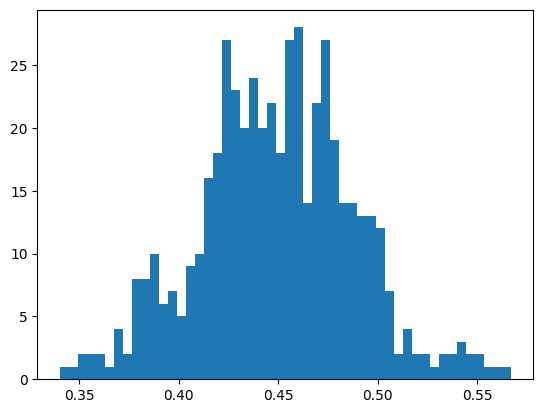

In [ ]:
# 3. distance
plt.hist(df_healthy['Mean_distance_tokens'], bins=50)
plt.show()

(-0.5, 0.6)

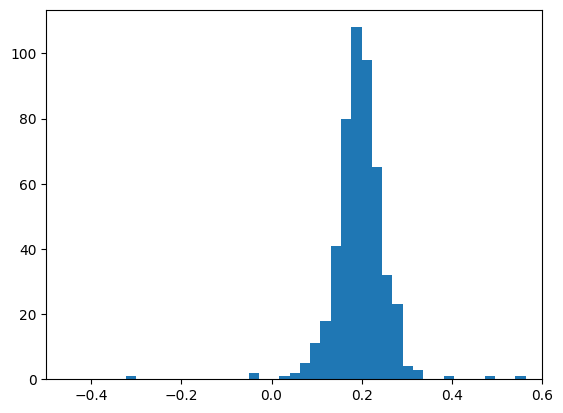

In [ ]:
# 4. silhouette score
plt.hist(df_healthy['Silhouette_score_tokens'], bins=300)
plt.xlim([-0.5, 0.6])

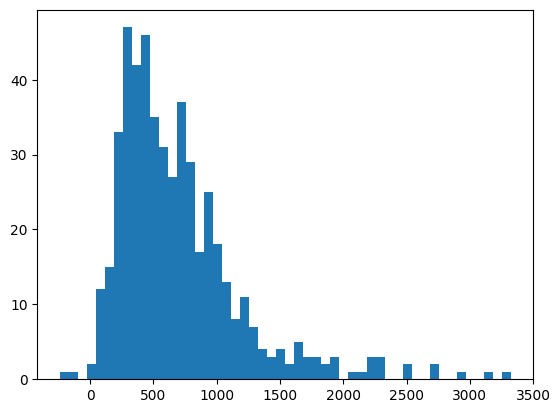

In [ ]:
# 5. t-score
plt.hist(df_healthy['Mean_cluster_t_score_tokens'], bins=50)
plt.show()

## проверка статистической значимости

In [ ]:
# 1. number of switches
# распределения неизвестны, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

u_test, p = mannwhitneyu(df_healthy['Switch_number_tokens'], df_pd['Switch_number_tokens'], nan_policy='omit')
print(f'statistic: {u_test}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 26086.0, p-value: 6.747075207668067e-12
Different distributions (reject H0)


In [ ]:
# 2. cluster size
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Mean_cluster_size_tokens'], df_pd['Mean_cluster_size_tokens'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 4.853105119392563, p-value: 1.572550029955769e-06
Different distributions (reject H0)


In [ ]:
# 3. distance
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Mean_distance_tokens'], df_pd['Mean_distance_tokens'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: -5.1360865278815435, p-value: 3.8610849103148997e-07
Different distributions (reject H0)


In [ ]:
# 4. silhouette score
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Silhouette_score_tokens'], df_pd['Silhouette_score_tokens'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 0.34285724722795646, p-value: 0.7318327035185073
Same distributions (H0)


In [ ]:
# 5. t-score
# распределения неизвестны, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

u_test, p = mannwhitneyu(df_healthy['Mean_cluster_t_score_tokens'], df_pd['Mean_cluster_t_score_tokens'], nan_policy='omit')
print(f'statistic: {u_test}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 29187.0, p-value: 1.6944015195136315e-20
Different distributions (reject H0)


## отбор типа предобработки

### объединение датасетов

In [ ]:
df_healthy = pd.read_excel('clusters_metrics_dataset_final.xlsx',
                           sheet_name='healthy').loc[0:500]
df_pd = pd.read_excel('clusters_metrics_dataset_final.xlsx',
                           sheet_name='PD').loc[0:68]

In [ ]:
df_healthy_tag = df_healthy.copy(deep=True)
df_healthy_tag['diagnosis'] = np.nan
df_healthy_tag['group_tag'] = 0
df_healthy_tag

,ID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,diagnosis,group_tag
0,PN-01,"[['необходимый', 'на'], ['пол', 'положить', 'с...",42.0,5.632353,0.489722,0.258365,720.614508,NaN,0
1,PN-01,"[['самым', 'запоминаться', 'подарок'], ['быть'...",17.0,5.290909,0.529752,0.268354,344.497041,NaN,0
2,PN-01,"[['человек', 'быть', 'очень'], ['завистливый',...",21.0,5.438356,0.543546,0.242556,418.212941,NaN,0
3,PN-02,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",44.0,6.168831,0.464152,0.189710,752.209701,NaN,0
4,PN-02,"[['когда', 'я', 'ещё', 'учиться', 'в', 'школа'...",24.0,4.277108,0.476511,0.064982,412.210461,NaN,0
...,...,...,...,...,...,...,...,...,...
496,TPN-14,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",34.0,5.793103,0.461374,0.198552,796.732069,NaN,0
497,TPN-14,"[['аудио', 'запись'], ['три', 'рассказать', 'п...",64.0,4.600917,0.510201,0.176434,1110.119659,NaN,0
498,TPN-14,"[['аудио', 'запись'], ['три', 'рассказать', 'п...",58.0,4.831633,0.537384,0.195496,857.269822,NaN,0
499,TPN-14,"[['рассказывать', 'подробный', 'история', 'изо...",104.0,4.825193,0.504320,0.196066,1749.997580,NaN,0


In [ ]:
df_pd_tag = df_pd.copy(deep=True)
df_pd_tag['group_tag'] = 1
df_pd_tag

,ID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,diagnosis,group_tag
0,PD-001,"[['ну', 'больше', 'всего'], ['меня', 'впечатли...",14.0,5.122449,0.505469,0.152961,156.245227,schizotypal.disorder,1
1,PD-002,"[['не', 'такой'], ['уж', 'обычный', 'традицион...",47.0,4.552941,0.563129,0.238804,618.934870,bipolar.affective.disorder,1
2,PD-004,"[['я', 'быть', 'в'], ['начальный', 'класс'], [...",40.0,4.414966,0.535013,0.145031,58.018152,borderline.personality.disorder,1
3,PD-005,"[['я', 'не', 'помнить'], ['свой', 'подарок'], ...",20.0,4.651515,0.491485,0.157894,201.299511,schizotypal.disorder,1
4,PD-006,"[['так', 'мне', 'запомниться', 'подарок'], ['к...",44.0,4.705479,0.528634,0.222232,334.452118,borderline.personality.disorder,1
...,...,...,...,...,...,...,...,...,...
64,PD-076,"[['это', 'подарок'], ['собака', 'на', 'новый',...",7.0,4.083333,0.521235,0.270448,82.135843,schizotypal.disorder,1
65,PD-078,"[['так', 'ну'], ['хороший', 'у', 'меня'], ['ко...",44.0,4.284768,0.526479,0.195216,625.599975,schizophrenia,1
66,PD-079,"[['однажды', 'с', 'папа', 'мы'], ['поехать', '...",23.0,4.518072,0.489120,0.144007,160.300200,schizoaffective.disorder,1
67,PD-080,"[['я', 'один', 'раз'], ['пойти', 'гулять', 'с'...",17.0,4.264151,0.473115,0.180901,107.668551,schizotypal.disorder,1


In [ ]:
df_grouped = pd.concat([df_healthy_tag, df_pd_tag], ignore_index=True)
df_grouped

,ID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,diagnosis,group_tag
0,PN-01,"[['необходимый', 'на'], ['пол', 'положить', 'с...",42.0,5.632353,0.489722,0.258365,720.614508,NaN,0
1,PN-01,"[['самым', 'запоминаться', 'подарок'], ['быть'...",17.0,5.290909,0.529752,0.268354,344.497041,NaN,0
2,PN-01,"[['человек', 'быть', 'очень'], ['завистливый',...",21.0,5.438356,0.543546,0.242556,418.212941,NaN,0
3,PN-02,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",44.0,6.168831,0.464152,0.189710,752.209701,NaN,0
4,PN-02,"[['когда', 'я', 'ещё', 'учиться', 'в', 'школа'...",24.0,4.277108,0.476511,0.064982,412.210461,NaN,0
...,...,...,...,...,...,...,...,...,...
565,PD-076,"[['это', 'подарок'], ['собака', 'на', 'новый',...",7.0,4.083333,0.521235,0.270448,82.135843,schizotypal.disorder,1
566,PD-078,"[['так', 'ну'], ['хороший', 'у', 'меня'], ['ко...",44.0,4.284768,0.526479,0.195216,625.599975,schizophrenia,1
567,PD-079,"[['однажды', 'с', 'папа', 'мы'], ['поехать', '...",23.0,4.518072,0.489120,0.144007,160.300200,schizoaffective.disorder,1
568,PD-080,"[['я', 'один', 'раз'], ['пойти', 'гулять', 'с'...",17.0,4.264151,0.473115,0.180901,107.668551,schizotypal.disorder,1


### отбор типа

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
group_tag = df_grouped['group_tag']

In [ ]:
df_grouped_metrics = df_grouped.drop(['ID', 'tokens', 'tokens_without_stops',
                                      'lemmas_without_stops', 'lemmas',
                                      'diagnosis'], axis=1)
df_grouped_metrics

,Switch_number_tokens,Mean_cluster_size_tokens,Mean_distance_tokens,Silhouette_score_tokens,Mean_cluster_t_score_tokens,Switch_number_tokens_without_stops,Mean_cluster_size_tokens_without_stops,Mean_distance_tokens_without_stops,Silhouette_score_tokens_without_stops,Mean_cluster_t_score_tokens_without_stops,...,Mean_cluster_size_lemmas,Mean_distance_lemmas,Silhouette_score_lemmas,Mean_cluster_t_score_lemmas,Switch_number_lemmas_without_stops,Mean_cluster_size_lemmas_without_stops,Mean_distance_lemmas_without_stops,Silhouette_score_lemmas_without_stops,Mean_cluster_t_score_lemmas_without_stops,group_tag
0,42.0,5.661765,0.428440,0.199664,508.109940,30.0,7.166667,0.400741,0.150964,209.578666,...,5.632353,0.489722,0.273070,720.614508,28.0,7.111111,0.480149,0.251540,266.433253,0
1,14.0,5.370370,0.491251,0.185619,299.437973,8.0,6.647059,0.399236,0.108639,149.256798,...,5.290909,0.529752,0.268354,344.497041,8.0,6.606061,0.430015,0.130678,201.500834,0
2,21.0,5.287671,0.479614,0.225259,375.861670,14.0,6.872340,0.448138,0.249926,107.033955,...,5.438356,0.543546,0.242556,418.212941,16.0,7.085106,0.448142,0.191347,124.501709,0
3,41.0,6.311688,0.417164,0.121933,560.059015,33.0,7.600000,0.403408,0.115892,313.568226,...,6.168831,0.464152,0.202697,752.209701,34.0,7.434783,0.491429,0.234994,522.506322,0
4,26.0,4.277108,0.442196,0.091095,277.014617,16.0,5.755556,0.389647,0.089764,61.652690,...,4.277108,0.476511,0.064982,412.210461,15.0,5.755556,0.460531,0.161854,78.469512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,6.0,4.125000,0.462674,0.207923,92.680873,5.0,5.133333,0.396782,0.289068,27.105512,...,4.083333,0.521235,0.270448,82.135843,4.0,5.066667,0.558888,0.354476,35.920577,1
566,40.0,4.402685,0.524687,0.204499,540.656197,22.0,6.597015,0.430860,0.223862,107.398113,...,4.284768,0.526479,0.195216,625.599975,19.0,6.275362,0.497606,0.145375,137.889794,1
567,23.0,4.506024,0.446506,0.214002,175.639552,18.0,5.655172,0.391130,0.170367,92.295725,...,4.518072,0.489120,0.144007,160.300200,17.0,5.655172,0.479644,0.131802,93.652401,1
568,15.0,4.339623,0.485405,0.223821,101.878658,7.0,5.580645,0.484517,0.185918,53.116101,...,4.264151,0.473115,0.180901,107.668551,10.0,5.451613,0.457827,0.158249,47.506969,1


In [ ]:
df_grouped_metrics_no_target = df_grouped_metrics.drop('group_tag', axis=1)

mut_info = mutual_info_classif(df_grouped_metrics_no_target, group_tag, random_state=68)
mutual_info = pd.Series(mut_info)
mutual_info.index = df_grouped_metrics_no_target.columns
mutual_info_df = mutual_info.sort_values(ascending=False)
mutual_info_df

,0
Mean_cluster_t_score_lemmas,0.126759
Mean_cluster_t_score_lemmas_without_stops,0.126065
Mean_cluster_t_score_tokens_without_stops,0.099405
Mean_cluster_t_score_tokens,0.080522
Switch_number_lemmas_without_stops,0.055308
Switch_number_tokens_without_stops,0.046312
Mean_cluster_size_lemmas,0.035823
Switch_number_tokens,0.034015
Switch_number_lemmas,0.032453
Mean_distance_tokens,0.023494


In [ ]:
corr_matrix = df_grouped_metrics.corr()
corr_matrix['group_tag'].sort_values(ascending=False)

,group_tag
group_tag,1.000000
Mean_distance_tokens,0.210669
Mean_distance_tokens_without_stops,0.097712
Mean_distance_lemmas,0.086379
Mean_distance_lemmas_without_stops,0.073770
Silhouette_score_lemmas_without_stops,0.003411
Silhouette_score_lemmas,-0.009965
Silhouette_score_tokens,-0.014384
Silhouette_score_tokens_without_stops,-0.040248
Mean_cluster_size_tokens_without_stops,-0.130440


In [ ]:
# lemmas, lemmas without sw, lemmas, tokens, lemmas without sw --> выберем вариант лемматизации с сохранение стоп-слов (lemmas)

In [ ]:
df_grouped

,ID,tokens,Switch_number_tokens,Mean_cluster_size_tokens,Mean_distance_tokens,Silhouette_score_tokens,Mean_cluster_t_score_tokens,tokens_without_stops,Switch_number_tokens_without_stops,Mean_cluster_size_tokens_without_stops,...,Silhouette_score_lemmas,Mean_cluster_t_score_lemmas,lemmas_without_stops,Switch_number_lemmas_without_stops,Mean_cluster_size_lemmas_without_stops,Mean_distance_lemmas_without_stops,Silhouette_score_lemmas_without_stops,Mean_cluster_t_score_lemmas_without_stops,diagnosis,group_tag
0,PN-01,"[['необходимо', 'на', 'пол', 'положить', 'стол...",42.0,5.661765,0.428440,0.199664,508.109940,"[['необходимо', 'пол', 'положить', 'столешницу...",30.0,7.166667,...,0.273070,720.614508,"[['необходимый', 'пол', 'положить', 'столешниц...",28.0,7.111111,0.480149,0.251540,266.433253,NaN,0
1,PN-01,"[['самым', 'запоминающимся', 'подарком', 'был'...",14.0,5.370370,0.491251,0.185619,299.437973,"[['самым', 'запоминающимся', 'подарком', 'посл...",8.0,6.647059,...,0.268354,344.497041,"[['самым', 'запоминаться', 'подарок', 'последн...",8.0,6.606061,0.430015,0.130678,201.500834,NaN,0
2,PN-01,"[['человек', 'был', 'очень', 'завистливый', 'о...",21.0,5.287671,0.479614,0.225259,375.861670,"[['человек', 'очень'], ['завистливый', 'он'], ...",14.0,6.872340,...,0.242556,418.212941,"[['человек', 'очень'], ['завистливый', 'он', '...",16.0,7.085106,0.448142,0.191347,124.501709,NaN,0
3,PN-02,"[['переверните', 'крышку', 'табурета'], ['тыль...",41.0,6.311688,0.417164,0.121933,560.059015,"[['переверните', 'крышку', 'табурета'], ['тыль...",33.0,7.600000,...,0.202697,752.209701,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",34.0,7.434783,0.491429,0.234994,522.506322,NaN,0
4,PN-02,"[['когда', 'я', 'еще', 'училась', 'в'], ['школ...",26.0,4.277108,0.442196,0.091095,277.014617,"[['когда', 'училась', 'школе', 'ко'], ['приеха...",16.0,5.755556,...,0.064982,412.210461,"[['когда', 'учиться', 'школа', 'к'], ['приехат...",15.0,5.755556,0.460531,0.161854,78.469512,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,PD-076,"[['это', 'подарок'], ['собака', 'на', 'новый',...",6.0,4.125000,0.462674,0.207923,92.680873,"[['это', 'подарок'], ['собака', 'новый', 'год'...",5.0,5.133333,...,0.270448,82.135843,"[['это', 'подарок'], ['собака', 'новый', 'год'...",4.0,5.066667,0.558888,0.354476,35.920577,schizotypal.disorder,1
566,PD-078,"[['так', 'ну'], ['хорошо', 'у', 'меня'], ['ког...",40.0,4.402685,0.524687,0.204499,540.656197,"[['так', 'у'], ['времени', 'сходить', 'подарко...",22.0,6.597015,...,0.195216,625.599975,"[['так', 'у'], ['время', 'сходить', 'подарок']...",19.0,6.275362,0.497606,0.145375,137.889794,schizophrenia,1
567,PD-079,"[['однажды', 'с'], ['папой', 'мы'], ['поехали'...",23.0,4.506024,0.446506,0.214002,175.639552,"[['однажды', 'папой'], ['поехали', 'крым'], ['...",18.0,5.655172,...,0.144007,160.300200,"[['однажды', 'папа', 'поехать', 'крым'], ['ост...",17.0,5.655172,0.479644,0.131802,93.652401,schizoaffective.disorder,1
568,PD-080,"[['я', 'один', 'раз'], ['пошла', 'гулять', 'с'...",15.0,4.339623,0.485405,0.223821,101.878658,"[['я', 'пошла'], ['гулять', 'кошкой', 'спрыгну...",7.0,5.580645,...,0.180901,107.668551,"[['я', 'пойти', 'гулять', 'кошка', 'спрыгнуть'...",10.0,5.451613,0.457827,0.158249,47.506969,schizotypal.disorder,1


In [ ]:
df_grouped_fin = df_grouped[['ID', 'lemmas', 'Switch_number_lemmas',
                             'Mean_cluster_size_lemmas',	'Mean_distance_lemmas',
                             'Silhouette_score_lemmas',	'Mean_cluster_t_score_lemmas', 'group_tag']]
df_grouped_fin.rename(columns={
    'Switch_number_lemmas': 'Switch_number',
    'Mean_cluster_size_lemmas': 'Mean_cluster_size',
    'Mean_distance_lemmas': 'Mean_distance',
    'Silhouette_score_lemmas': 'Silhouette_score',
    'Mean_cluster_t_score_lemmas': 'Mean_cluster_t_score'
}, inplace=True)

df_grouped_fin

KeyError: "['Switch_number_lemmas', 'Mean_cluster_size_lemmas', 'Mean_distance_lemmas', 'Silhouette_score_lemmas', 'Mean_cluster_t_score_lemmas'] not in index"

In [ ]:
df_grouped_fin.to_excel('clusters_metrics_dataset_grouped.xlsx')

In [ ]:
df_grouped

,ID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,diagnosis,group_tag
0,PN-01,"[['необходимый', 'на'], ['пол', 'положить', 'с...",42.0,5.632353,0.489722,0.258365,720.614508,NaN,0
1,PN-01,"[['самым', 'запоминаться', 'подарок'], ['быть'...",17.0,5.290909,0.529752,0.268354,344.497041,NaN,0
2,PN-01,"[['человек', 'быть', 'очень'], ['завистливый',...",21.0,5.438356,0.543546,0.242556,418.212941,NaN,0
3,PN-02,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",44.0,6.168831,0.464152,0.189710,752.209701,NaN,0
4,PN-02,"[['когда', 'я', 'ещё', 'учиться', 'в', 'школа'...",24.0,4.277108,0.476511,0.064982,412.210461,NaN,0
...,...,...,...,...,...,...,...,...,...
565,PD-076,"[['это', 'подарок'], ['собака', 'на', 'новый',...",7.0,4.083333,0.521235,0.270448,82.135843,schizotypal.disorder,1
566,PD-078,"[['так', 'ну'], ['хороший', 'у', 'меня'], ['ко...",44.0,4.284768,0.526479,0.195216,625.599975,schizophrenia,1
567,PD-079,"[['однажды', 'с', 'папа', 'мы'], ['поехать', '...",23.0,4.518072,0.489120,0.144007,160.300200,schizoaffective.disorder,1
568,PD-080,"[['я', 'один', 'раз'], ['пойти', 'гулять', 'с'...",17.0,4.264151,0.473115,0.180901,107.668551,schizotypal.disorder,1


In [ ]:
df_grouped.to_excel('clusters_metrics_dataset_grouped.xlsx')

## подбор пограничных значений метрик

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel
from sklearn.metrics import roc_curve, roc_auc_score, recall_score

from scipy.stats import norm, t, sem

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

### загрузка данных

In [3]:
df_grouped = pd.read_excel('clusters_metrics_dataset_grouped.xlsx').drop('Unnamed: 0', axis=1)

In [4]:
df_healthy = pd.read_excel('clusters_metrics_dataset_final.xlsx',
                           sheet_name='healthy').loc[0:500]
df_pd = pd.read_excel('clusters_metrics_dataset_final.xlsx', sheet_name='PD').loc[0:388]

In [5]:
df_pd

,speakerID,fileID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,diagnosis
0,PD-001,PD-001-instr-1-chair,"[['для', 'начало', 'нужный'], ['прикрепить', '...",18.0,4.973333,0.533179,0.170173,462.880671,schizotypal.disorder
1,PD-001,PD-001-pers-1-present,"[['ну', 'больше', 'всего'], ['меня', 'впечатли...",14.0,5.122449,0.505469,0.152961,246.584892,schizotypal.disorder
2,PD-001,PD-001-pic-1-sportsman,"[['какой', 'то'], ['мужчина', 'встречать'], ['...",53.0,4.670213,0.495580,0.195853,707.470312,schizotypal.disorder
3,PD-002,PD-002-instr-1-chair,"[['чтобы', 'собрать', 'табуретка'], ['нам', 'н...",25.0,5.161290,0.534357,0.270804,401.729574,bipolar.affective.disorder
4,PD-002,PD-002-pers-1-present,"[['не', 'такой'], ['уж', 'обычный', 'традицион...",48.0,4.547059,0.555346,0.235205,957.890011,bipolar.affective.disorder
...,...,...,...,...,...,...,...,...,...
384,PD-145,PD-145-pers-1-party,"[['самое', 'счастливый', 'что', 'то', 'мне', '...",24.0,4.789474,0.566227,0.222251,436.239553,schizophrenia
385,PD-145,PD-145-pic-1-winterday,"[['малыш', 'увидеть', 'в', 'окно', 'первый'], ...",37.0,4.955224,0.529699,0.185570,677.164806,schizophrenia
386,PD-146,PD-146-instr-1-chair,"[['нижний', 'часть', 'табуретка'], ['составлят...",23.0,5.205128,0.456138,0.191478,303.286756,schizoaffective.disorder
387,PD-146,PD-146-pers-1-trip,"[['бог', 'мой', 'это'], ['бой', 'а'], ['ну', '...",37.0,4.427419,0.502650,0.171310,464.450568,schizoaffective.disorder


### сравнение распределений: норма/ненорма

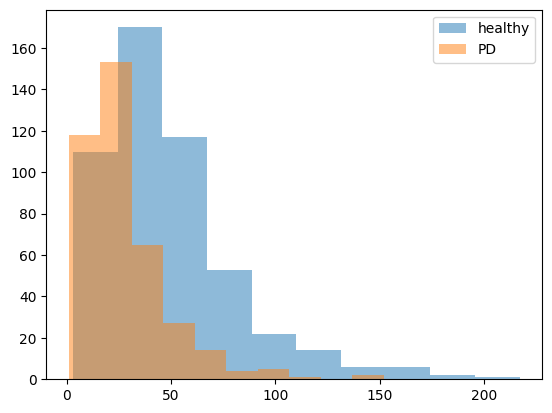

In [ ]:
# 1. number of switches
plt.hist(df_healthy['Switch_number'], label='healthy', alpha=0.5)
plt.hist(df_pd['Switch_number'], label='PD', alpha=0.5)
plt.legend()
plt.show()

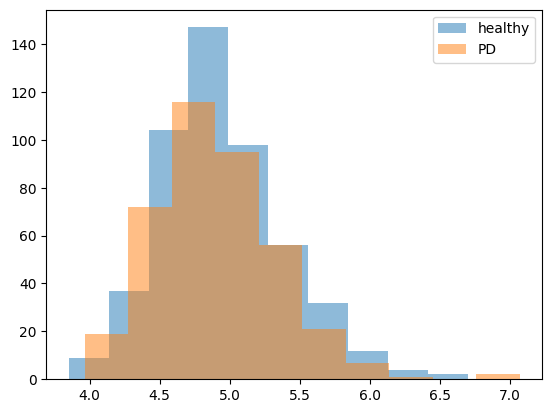

In [ ]:
# 2. cluster size
plt.hist(df_healthy['Mean_cluster_size'], label='healthy', alpha=0.5)
plt.hist(df_pd['Mean_cluster_size'], label='PD', alpha=0.5)
plt.legend()
plt.show()

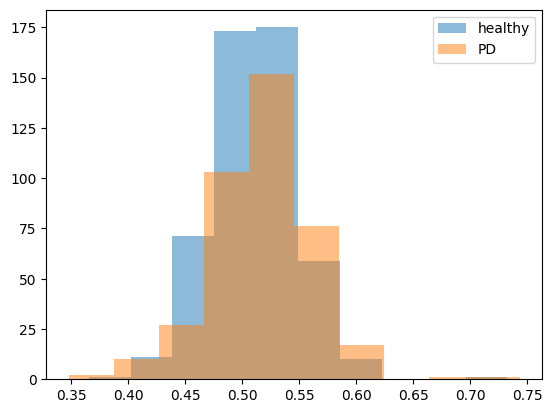

In [ ]:
# 3. distance
plt.hist(df_healthy['Mean_distance'], label='healthy', alpha=0.5)
plt.hist(df_pd['Mean_distance'], label='PD', alpha=0.5)
plt.legend()
plt.show()

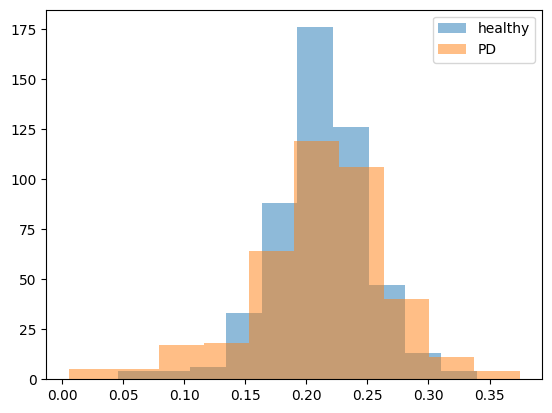

In [ ]:
# 4. Silhouette score
plt.hist(df_healthy['Silhouette_score'], label='healthy', alpha=0.5)
plt.hist(df_pd['Silhouette_score'], label='PD', alpha=0.5)
plt.legend()
plt.show()

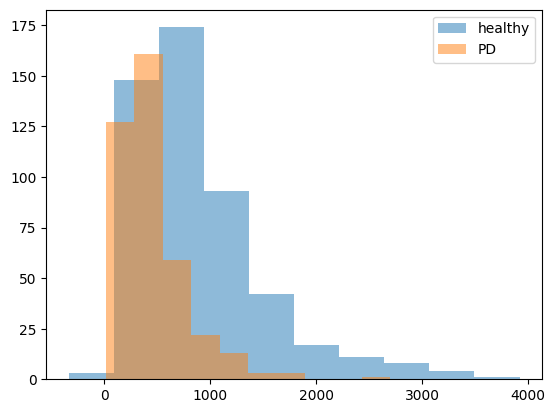

In [ ]:
# 5. t-score
plt.hist(df_healthy['Mean_cluster_t_score'], label='healthy', alpha=0.5)
plt.hist(df_pd['Mean_cluster_t_score'], label='PD', alpha=0.5)
plt.legend()
plt.show()

### новая проверка статистической значимости (теперь на леммах)

In [ ]:
# 1. number of switches
# распределения неизвестны, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

u_test, p = mannwhitneyu(df_healthy['Switch_number'], df_pd['Switch_number'])
print(f'statistic: {u_test}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 143673.0, p-value: 5.449360828906172e-34
Different distributions (reject H0)


In [ ]:
# 2. cluster size
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Mean_cluster_size'], df_pd['Mean_cluster_size'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 1.5204887803638871, p-value: 0.128744147111405
Same distributions (H0)


In [ ]:
# 3. distance
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Mean_distance'], df_pd['Mean_distance'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: -2.598374129219085, p-value: 0.009521863367097315
Different distributions (reject H0)


In [ ]:
# 4. silhouette score
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Silhouette_score'], df_pd['Silhouette_score'])
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: -0.17652519576067763, p-value: 0.8599216066152324
Same distributions (H0)


In [ ]:
# 5. t-score
# распределения неизвестны, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

u_test, p = mannwhitneyu(df_healthy['Mean_cluster_t_score'], df_pd['Mean_cluster_t_score'])
print(f'statistic: {u_test}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 147482.0, p-value: 1.6195014655962622e-39
Different distributions (reject H0)


### подбор пограничных значений

In [6]:
df_grouped

,ID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,group_tag,diagnosis
0,PN-01,"[['необходимый', 'на'], ['пол', 'положить', 'с...",42,5.632353,0.489722,0.273070,720.614508,0,NaN
1,PN-01,"[['самым', 'запоминаться', 'подарок'], ['быть'...",17,5.290909,0.529752,0.268354,344.497041,0,NaN
2,PN-01,"[['человек', 'быть', 'очень'], ['завистливый',...",21,5.438356,0.543546,0.242556,418.212941,0,NaN
3,PN-02,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",44,6.168831,0.464152,0.202697,752.209701,0,NaN
4,PN-02,"[['когда', 'я', 'ещё', 'учиться', 'в', 'школа'...",24,4.277108,0.476511,0.064982,412.210461,0,NaN
...,...,...,...,...,...,...,...,...,...
885,PD-145,"[['самое', 'счастливый', 'что', 'то', 'мне', '...",24,4.789474,0.566227,0.222251,436.239553,1,schizophrenia
886,PD-145,"[['малыш', 'увидеть', 'в', 'окно', 'первый'], ...",37,4.955224,0.529699,0.185570,677.164806,1,schizophrenia
887,PD-146,"[['нижний', 'часть', 'табуретка'], ['составлят...",23,5.205128,0.456138,0.191478,303.286756,1,schizoaffective.disorder
888,PD-146,"[['бог', 'мой', 'это'], ['бой', 'а'], ['ну', '...",37,4.427419,0.502650,0.171310,464.450568,1,schizoaffective.disorder


In [7]:
df_grouped_metrics_no_target = df_grouped[['Switch_number', 'Mean_cluster_size',
                                          'Mean_distance', 'Silhouette_score', 'Mean_cluster_t_score']]
labels = df_grouped['group_tag']

In [8]:
df_grouped_metrics_no_target

,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score
0,42,5.632353,0.489722,0.273070,720.614508
1,17,5.290909,0.529752,0.268354,344.497041
2,21,5.438356,0.543546,0.242556,418.212941
3,44,6.168831,0.464152,0.202697,752.209701
4,24,4.277108,0.476511,0.064982,412.210461
...,...,...,...,...,...
885,24,4.789474,0.566227,0.222251,436.239553
886,37,4.955224,0.529699,0.185570,677.164806
887,23,5.205128,0.456138,0.191478,303.286756
888,37,4.427419,0.502650,0.171310,464.450568


#### youden j index

In [9]:
# Функция для нахождения оптимального порога по ROC-кривой для одного признака
def find_optimal_threshold_youden(feature, y):
    fpr, tpr, thresholds = roc_curve(y, feature)
    J = tpr - fpr  # Youden's J statistic
    optimal_idx = np.argmax(J)
    optimal_threshold = thresholds[optimal_idx]
    auc = roc_auc_score(y, feature)
    return optimal_threshold, auc, fpr, tpr, thresholds[optimal_idx]

Признак: Switch_number
Оптимальный порог для Switch_number: inf
AUC для Switch_number: 0.2627957452703847



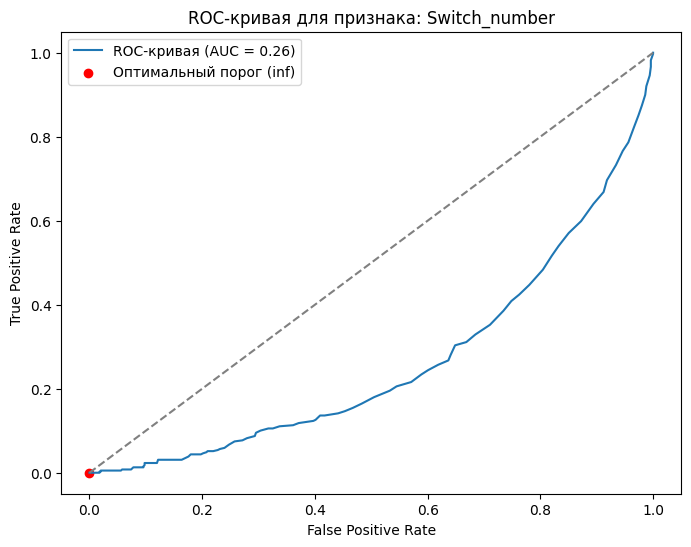

Признак: Mean_cluster_size
Оптимальный порог для Mean_cluster_size: 6.827586206896552
AUC для Mean_cluster_size: 0.4712169491351487



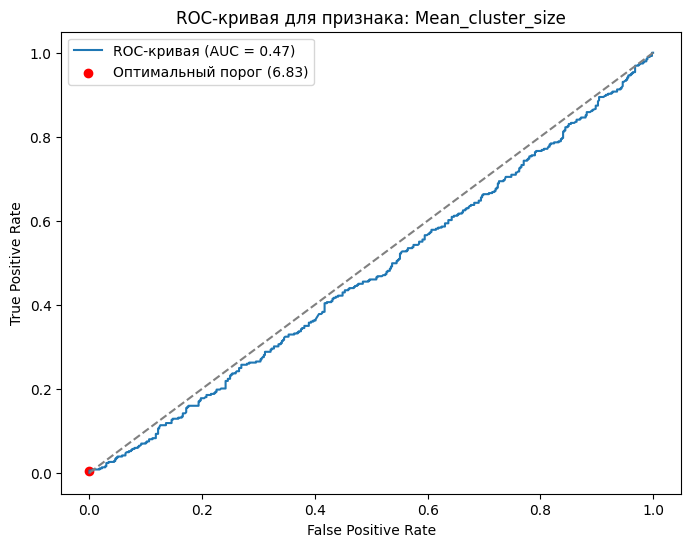

Признак: Mean_distance
Оптимальный порог для Mean_distance: 0.5319682886967292
AUC для Mean_distance: 0.5570709480781368



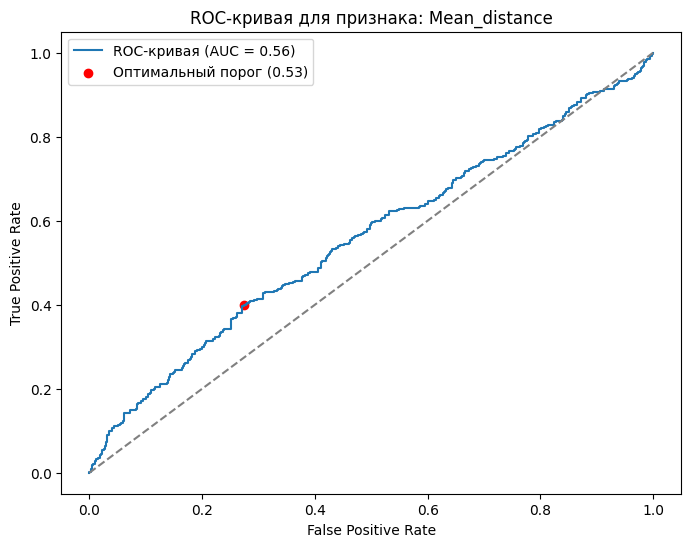

Признак: Silhouette_score
Оптимальный порог для Silhouette_score: 0.2431096250314104
AUC для Silhouette_score: 0.5047385947898547



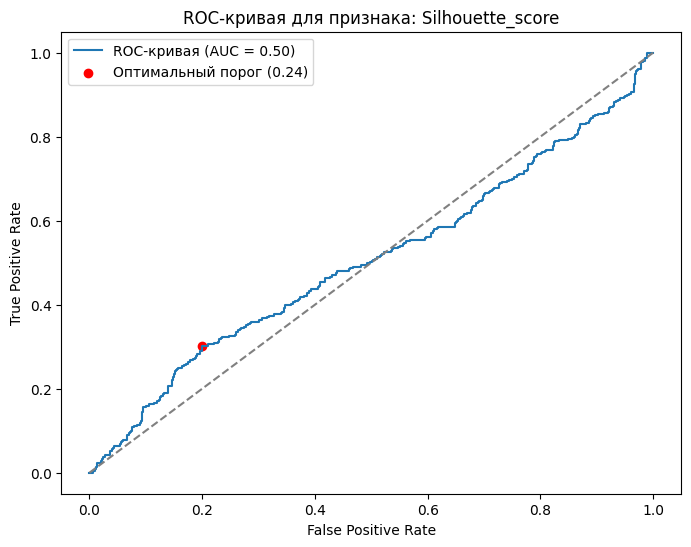

Признак: Mean_cluster_t_score
Оптимальный порог для Mean_cluster_t_score: 16.24440071450184
AUC для Mean_cluster_t_score: 0.2432512866298252



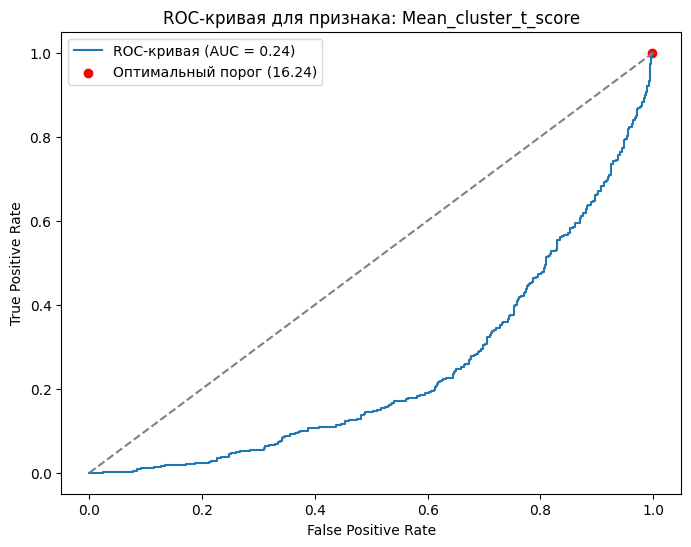

Признак: Switch_number
Оптимальный порог: inf
AUC: 0.2627957452703847

Признак: Mean_cluster_size
Оптимальный порог: 6.827586206896552
AUC: 0.4712169491351487

Признак: Mean_distance
Оптимальный порог: 0.5319682886967292
AUC: 0.5570709480781368

Признак: Silhouette_score
Оптимальный порог: 0.2431096250314104
AUC: 0.5047385947898547

Признак: Mean_cluster_t_score
Оптимальный порог: 16.24440071450184
AUC: 0.2432512866298252



In [10]:
# Словарь для хранения результатов по каждому признаку
results = {}

# Проходим по каждому признаку
for column in df_grouped_metrics_no_target.columns:
    print(f"Признак: {column}")
    optimal_threshold, auc, fpr, tpr, best_threshold = find_optimal_threshold_youden(df_grouped_metrics_no_target[column], labels)

    # Сохраняем результаты в словарь
    results[column] = {
        'Оптимальный порог Youden\'s J statistic': optimal_threshold.item(),
        'AUC': auc.item()
    }

    # Выводим результаты для текущего признака
    print(f"Оптимальный порог для {column}: {optimal_threshold}")
    print(f"AUC для {column}: {auc}\n")

    # Построение ROC-кривой для признака
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {auc:.2f})')
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red', label=f'Оптимальный порог ({optimal_threshold:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая для признака: {column}')
    plt.legend()
    plt.show()

# Выводим финальные результаты по всем признакам
for feature, result in results.items():
    print(f"Признак: {feature}")
    print(f'''Оптимальный порог: {result["Оптимальный порог Youden's J statistic"]}''')
    print(f"AUC: {result['AUC']}\n")

In [11]:
results

{'Switch_number': {"Оптимальный порог Youden's J statistic": inf,
  'AUC': 0.2627957452703847},
 'Mean_cluster_size': {"Оптимальный порог Youden's J statistic": 6.827586206896552,
  'AUC': 0.4712169491351487},
 'Mean_distance': {"Оптимальный порог Youden's J statistic": 0.5319682886967292,
  'AUC': 0.5570709480781368},
 'Silhouette_score': {"Оптимальный порог Youden's J statistic": 0.2431096250314104,
  'AUC': 0.5047385947898547},
 'Mean_cluster_t_score': {"Оптимальный порог Youden's J statistic": 16.24440071450184,
  'AUC': 0.2432512866298252}}

#### mean+std

In [12]:
def find_optimal_threshold_mean_std(feature, y):

    feature_df = pd.DataFrame(feature).join(y)
    norm = feature_df[feature_df['group_tag'] == 0].drop('group_tag', axis=1)
    PD = feature_df[feature_df['group_tag'] == 1].drop('group_tag', axis=1)

    norm_mean = norm.mean().item()
    pd_mean = PD.mean().item()
    norm_std = norm.std().item()

    if norm_mean > pd_mean:
        return norm_mean - norm_std, 'norm mean is higher'
    else:
        return norm_mean + norm_std, 'norm mean is lower'

In [13]:
for column in df_grouped_metrics_no_target.columns:
    print(f"Признак: {column}")
    optimal_threshold, means_relation = find_optimal_threshold_mean_std(df_grouped_metrics_no_target[column], labels)

    # Сохраняем результаты в словарь
    results[column].update({
        'Оптимальный порог Mean + Std': optimal_threshold,
        'Статус отношения средних': means_relation
    })

    # Выводим результаты для текущего признака
    print(f"Оптимальный порог для {column}: {optimal_threshold}")

Признак: Switch_number
Оптимальный порог для Switch_number: 16.67532179812391
Признак: Mean_cluster_size
Оптимальный порог для Mean_cluster_size: 4.514225353161037
Признак: Mean_distance
Оптимальный порог для Mean_distance: 0.5487679673077563
Признак: Silhouette_score
Оптимальный порог для Silhouette_score: 0.41971524501176616
Признак: Mean_cluster_t_score
Оптимальный порог для Mean_cluster_t_score: 275.79834157841105


In [14]:
results

{'Switch_number': {"Оптимальный порог Youden's J statistic": inf,
  'AUC': 0.2627957452703847,
  'Оптимальный порог Mean + Std': 16.67532179812391,
  'Статус отношения средних': 'norm mean is higher'},
 'Mean_cluster_size': {"Оптимальный порог Youden's J statistic": 6.827586206896552,
  'AUC': 0.4712169491351487,
  'Оптимальный порог Mean + Std': 4.514225353161037,
  'Статус отношения средних': 'norm mean is higher'},
 'Mean_distance': {"Оптимальный порог Youden's J statistic": 0.5319682886967292,
  'AUC': 0.5570709480781368,
  'Оптимальный порог Mean + Std': 0.5487679673077563,
  'Статус отношения средних': 'norm mean is lower'},
 'Silhouette_score': {"Оптимальный порог Youden's J statistic": 0.2431096250314104,
  'AUC': 0.5047385947898547,
  'Оптимальный порог Mean + Std': 0.41971524501176616,
  'Статус отношения средних': 'norm mean is lower'},
 'Mean_cluster_t_score': {"Оптимальный порог Youden's J statistic": 16.24440071450184,
  'AUC': 0.2432512866298252,
  'Оптимальный порог Mea

#### подбор лучшего порога

In [15]:
def threshold_classifier(feature, y, threshold, means_relation):

    if 'higher' in means_relation:
        predicted_labels = np.where(np.array(feature) >= threshold, 0, 1)
    else:
        predicted_labels = np.where(np.array(feature) <= threshold, 0, 1)

    return recall_score(y, predicted_labels) # так как нам важнее всего то, насколько качественно распознаются больные

In [16]:
def find_best_threshold(results, feature, y):

    current_feature_result = results[feature.name]

    if feature.name == 'Switch_number':
        recall_mean_std = threshold_classifier(feature,
                                         y,
                                         current_feature_result['Оптимальный порог Mean + Std'],
                                         current_feature_result['Статус отношения средних'])
        return (current_feature_result['Оптимальный порог Mean + Std'],
        recall_mean_std,
        current_feature_result['Статус отношения средних'], 'Mean + Std')

    recall_youden = threshold_classifier(feature,
                                         y,
                                         current_feature_result['Оптимальный порог Youden\'s J statistic'],
                                         current_feature_result['Статус отношения средних'])
    recall_mean_std = threshold_classifier(feature,
                                         y,
                                         current_feature_result['Оптимальный порог Mean + Std'],
                                         current_feature_result['Статус отношения средних'])

    if recall_youden > recall_mean_std:
        return (current_feature_result['Оптимальный порог Youden\'s J statistic'],
        recall_youden,
        current_feature_result['Статус отношения средних'],
                'Youden\'s J statistic')
    else:
        return (current_feature_result['Оптимальный порог Mean + Std'],
        recall_mean_std,
        current_feature_result['Статус отношения средних'],
                'Mean + Std')

In [17]:
thresholds_dict = {}

for column in df_grouped_metrics_no_target.columns:

    best_threshold, threshold_recall, means_relations, threshold_type = find_best_threshold(results,
                                                                            df_grouped_metrics_no_target[column],
                                                                            labels)

    # Сохраняем результаты в словарь
    thresholds_dict[column] = {
        'Оптимальный порог': best_threshold,
        'Значение recall': threshold_recall,
        'Статус отношения средних': means_relations,
        'Метрика для порога': threshold_type
    }

In [18]:
thresholds_dict
# для количества свичей возьмём порог по mean+std

{'Switch_number': {'Оптимальный порог': 16.67532179812391,
  'Значение recall': 0.3033419023136247,
  'Статус отношения средних': 'norm mean is higher',
  'Метрика для порога': 'Mean + Std'},
 'Mean_cluster_size': {'Оптимальный порог': 6.827586206896552,
  'Значение recall': 0.9948586118251928,
  'Статус отношения средних': 'norm mean is higher',
  'Метрика для порога': "Youden's J statistic"},
 'Mean_distance': {'Оптимальный порог': 0.5319682886967292,
  'Значение recall': 0.39588688946015427,
  'Статус отношения средних': 'norm mean is lower',
  'Метрика для порога': "Youden's J statistic"},
 'Silhouette_score': {'Оптимальный порог': 0.2431096250314104,
  'Значение recall': 0.2982005141388175,
  'Статус отношения средних': 'norm mean is lower',
  'Метрика для порога': "Youden's J statistic"},
 'Mean_cluster_t_score': {'Оптимальный порог': 275.79834157841105,
  'Значение recall': 0.3161953727506427,
  'Статус отношения средних': 'norm mean is higher',
  'Метрика для порога': 'Mean + S

##### подбор порогов для каждой группы

In [19]:
df_grouped['diagnosis'].unique()

array([nan, 'schizotypal.disorder', 'bipolar.affective.disorder',
       'borderline.personality.disorder', 'recurrent.depressive.disorder',
       'depressive.episode', 'schizophrenia', 'schizoaffective.disorder',
       'personality.disorder'], dtype=object)

In [41]:
df_specific_pd = df_grouped[(df_grouped['diagnosis'] == 'bipolar.affective.disorder') | # меняем значение в зависимости от группы
                            (df_grouped['diagnosis'].isna())]
df_specific_pd

,ID,lemmas,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score,group_tag,diagnosis
0,PN-01,"[['необходимый', 'на'], ['пол', 'положить', 'с...",42,5.632353,0.489722,0.273070,720.614508,0,NaN
1,PN-01,"[['самым', 'запоминаться', 'подарок'], ['быть'...",17,5.290909,0.529752,0.268354,344.497041,0,NaN
2,PN-01,"[['человек', 'быть', 'очень'], ['завистливый',...",21,5.438356,0.543546,0.242556,418.212941,0,NaN
3,PN-02,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",44,6.168831,0.464152,0.202697,752.209701,0,NaN
4,PN-02,"[['когда', 'я', 'ещё', 'учиться', 'в', 'школа'...",24,4.277108,0.476511,0.064982,412.210461,0,NaN
...,...,...,...,...,...,...,...,...,...
782,PD-099,"[['это', 'путешествие'], ['было', 'по', 'мален...",19,5.208955,0.563466,0.252690,216.852207,1,bipolar.affective.disorder
783,PD-099,"[['мужчина', 'столкнуться', 'с', 'комплекс'], ...",17,4.355932,0.583867,0.265281,375.657283,1,bipolar.affective.disorder
878,PD-143,"[['на', 'первый'], ['картинка', 'лежать', 'сто...",28,4.752577,0.522173,0.230546,473.051935,1,bipolar.affective.disorder
879,PD-143,"[['последний', 'поездка'], ['ну', 'не', 'после...",50,4.406593,0.571018,0.219260,776.431167,1,bipolar.affective.disorder


#### непосредственно подбор:

In [42]:
df_grouped_metrics_no_target = df_specific_pd[['Switch_number', 'Mean_cluster_size',
                                          'Mean_distance', 'Silhouette_score', 'Mean_cluster_t_score']]
labels = df_specific_pd['group_tag']
df_grouped_metrics_no_target

,Switch_number,Mean_cluster_size,Mean_distance,Silhouette_score,Mean_cluster_t_score
0,42,5.632353,0.489722,0.273070,720.614508
1,17,5.290909,0.529752,0.268354,344.497041
2,21,5.438356,0.543546,0.242556,418.212941
3,44,6.168831,0.464152,0.202697,752.209701
4,24,4.277108,0.476511,0.064982,412.210461
...,...,...,...,...,...
782,19,5.208955,0.563466,0.252690,216.852207
783,17,4.355932,0.583867,0.265281,375.657283
878,28,4.752577,0.522173,0.230546,473.051935
879,50,4.406593,0.571018,0.219260,776.431167


In [43]:
# Словарь для хранения результатов по каждому признаку
results = {}

# Проходим по каждому признаку
for column in df_grouped_metrics_no_target.columns:
    print(f"Признак: {column}")
    optimal_threshold, auc, fpr, tpr, best_threshold = find_optimal_threshold_youden(df_grouped_metrics_no_target[column], labels)

    # Сохраняем результаты в словарь
    results[column] = {
        'Оптимальный порог Youden\'s J statistic': optimal_threshold,
        'AUC': auc
    }

    # Выводим результаты для текущего признака
    print(f"Оптимальный порог для {column}: {optimal_threshold}")
    print(f"AUC для {column}: {auc}\n")

# Выводим финальные результаты по всем признакам
for feature, result in results.items():
    print(f"Признак: {feature}")
    print(f'''Оптимальный порог: {result["Оптимальный порог Youden's J statistic"]}''')
    print(f"AUC: {result['AUC']}\n")

Признак: Switch_number
Оптимальный порог для Switch_number: 4.0
AUC для Switch_number: 0.25870899710013934

Признак: Mean_cluster_size
Оптимальный порог для Mean_cluster_size: 4.974358974358974
AUC для Mean_cluster_size: 0.49675177945994803

Признак: Mean_distance
Оптимальный порог для Mean_distance: 0.5299646301815907
AUC для Mean_distance: 0.5980868451775694

Признак: Silhouette_score
Оптимальный порог для Silhouette_score: 0.2431096250314104
AUC для Silhouette_score: 0.5635898015290175

Признак: Mean_cluster_t_score
Оптимальный порог для Mean_cluster_t_score: 17.931922886199
AUC для Mean_cluster_t_score: 0.24048130154784775

Признак: Switch_number
Оптимальный порог: 4.0
AUC: 0.25870899710013934

Признак: Mean_cluster_size
Оптимальный порог: 4.974358974358974
AUC: 0.49675177945994803

Признак: Mean_distance
Оптимальный порог: 0.5299646301815907
AUC: 0.5980868451775694

Признак: Silhouette_score
Оптимальный порог: 0.2431096250314104
AUC: 0.5635898015290175

Признак: Mean_cluster_t_sco

In [44]:
for column in df_grouped_metrics_no_target.columns:
    print(f"Признак: {column}")
    optimal_threshold, means_relation = find_optimal_threshold_mean_std(df_grouped_metrics_no_target[column], labels)

    # Сохраняем результаты в словарь
    results[column].update({
        'Оптимальный порог Mean + Std': optimal_threshold,
        'Статус отношения средних': means_relation
    })

    # Выводим результаты для текущего признака
    print(f"Оптимальный порог для {column}: {optimal_threshold}")

Признак: Switch_number
Оптимальный порог для Switch_number: 16.67532179812391
Признак: Mean_cluster_size
Оптимальный порог для Mean_cluster_size: 4.514225353161037
Признак: Mean_distance
Оптимальный порог для Mean_distance: 0.5487679673077563
Признак: Silhouette_score
Оптимальный порог для Silhouette_score: 0.41971524501176616
Признак: Mean_cluster_t_score
Оптимальный порог для Mean_cluster_t_score: 275.79834157841105


In [45]:
results

{'Switch_number': {"Оптимальный порог Youden's J statistic": np.float64(4.0),
  'AUC': np.float64(0.25870899710013934),
  'Оптимальный порог Mean + Std': 16.67532179812391,
  'Статус отношения средних': 'norm mean is higher'},
 'Mean_cluster_size': {"Оптимальный порог Youden's J statistic": np.float64(4.974358974358974),
  'AUC': np.float64(0.49675177945994803),
  'Оптимальный порог Mean + Std': 4.514225353161037,
  'Статус отношения средних': 'norm mean is higher'},
 'Mean_distance': {"Оптимальный порог Youden's J statistic": np.float64(0.5299646301815907),
  'AUC': np.float64(0.5980868451775694),
  'Оптимальный порог Mean + Std': 0.5487679673077563,
  'Статус отношения средних': 'norm mean is lower'},
 'Silhouette_score': {"Оптимальный порог Youden's J statistic": np.float64(0.2431096250314104),
  'AUC': np.float64(0.5635898015290175),
  'Оптимальный порог Mean + Std': 0.41971524501176616,
  'Статус отношения средних': 'norm mean is lower'},
 'Mean_cluster_t_score': {"Оптимальный пор

In [46]:
thresholds_dict = {}

for column in df_grouped_metrics_no_target.columns:

    best_threshold, threshold_recall, means_relations, threshold_type = find_best_threshold(results,
                                                                            df_grouped_metrics_no_target[column],
                                                                            labels)

    # Сохраняем результаты в словарь
    thresholds_dict[column] = {
        'Оптимальный порог': best_threshold,
        'Значение recall': threshold_recall,
        'Статус отношения средних': means_relations,
        'Метрика для порога': threshold_type
    }

In [47]:
thresholds_dict

{'Switch_number': {'Оптимальный порог': 16.67532179812391,
  'Значение recall': 0.29245283018867924,
  'Статус отношения средних': 'norm mean is higher',
  'Метрика для порога': 'Mean + Std'},
 'Mean_cluster_size': {'Оптимальный порог': np.float64(4.974358974358974),
  'Значение recall': 0.5471698113207547,
  'Статус отношения средних': 'norm mean is higher',
  'Метрика для порога': "Youden's J statistic"},
 'Mean_distance': {'Оптимальный порог': np.float64(0.5299646301815907),
  'Значение recall': 0.5283018867924528,
  'Статус отношения средних': 'norm mean is lower',
  'Метрика для порога': "Youden's J statistic"},
 'Silhouette_score': {'Оптимальный порог': np.float64(0.2431096250314104),
  'Значение recall': 0.4056603773584906,
  'Статус отношения средних': 'norm mean is lower',
  'Метрика для порога': "Youden's J statistic"},
 'Mean_cluster_t_score': {'Оптимальный порог': 275.79834157841105,
  'Значение recall': 0.3018867924528302,
  'Статус отношения средних': 'norm mean is higher